## **1. Introduction** <a id="1"></a>

<a><img style="float: right;" src="https://pbs.twimg.com/media/D_SZjUSWkAENmvg.jpg" width="300" /></a>
Traditionally, the game of basketball had clearly defined player positions with archetypal body profiles. In simplistic terms, the small players would dribble the ball and pass, slightly taller shooting guards would hit 3 pointers, the medium sized small forwards would attack the basket and the bigs would hustle for rebounds. 

However, the lines between player positions and roles have increasingly been blurring around the NBA. This change can be attributed to the successful implementation of '[small-ball](https://en.wikipedia.org/wiki/Small_ball_(basketball)' style of play by the Miami Heat and Golden State Warriors in the early and middle '10 respectively.


These changes inevitably meant that players bodies had to adapt. This notebook looks at how the physical profiles of NBA players have changed over two decades between 1996 and 2019.

### **1.1 Table of Contents** <a id="1.1"></a>
* [1. Introduction](#1)
   * [1.1 Table of Contents](#1.1)
   * [1.2 Notebook Preparation](#1.2)
* [2. Data Preparation](#2)
   * [2.1 Creation of Additional Variables](#2.1)
* [3. Height and Weight Exploration](#3)
   * [3.1 Main Variable Analysis](#3.1)
   * [3.2 Height and Weight over Time](#3.2)
   * [3.3 Size and Geography](#3.3)
   * [3.4 Height and Weight Impact on Performance](#3.4)
   * [3.5 Weight Transformations](#3.5)
   * [3.6 Optimal Heights and Weights](#3.6)
* [4. Player Clustering](#4)
* [5. Conclusion](#5)

### 1.2 Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [1]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

## **2. Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [2]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('ExsitingDatasets/all_seasons.csv', index_col=0)
country_codes = pd.read_csv("ExsitingDatasets/country_code.csv", index_col=0)

df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           12844 no

No records appear to be missing. However, the following edits will have to be made:
1. Create ```drafted``` column with boolean 0/1 logic 
   * Complete
2. Convert ```draft_year``` column to integer type
   * Complete
3. Convert ```season``` column to integer type
   * Complete

In [4]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Upon first inspection, the following items stand out:
1. Maximum ```gp``` (games played) number is 85. The NBA season is 82 games, so the extra games will have to be examined
   * After examining the dataset in detail, we find 14 players who have recorded more than 82 games played. [This Reddit thread](https://www.reddit.com/r/nba/comments/a8bsyn/in_the_200304_season_theo_ratliff_and_shareef/) suggests the number is higher than 82 because these players have been traded mid-season. For this reason, the records will not be adjusted in any way.
2. ```net_rating``` values are between -200 and 300. This seems odd and the formula for calculating ```net_rating``` will have to be reviewed
   * Official ```net_rating``` calculation from the NBA: **NetRtg = 100*((Points)/(POSS) - 100*((Opp Points)/(Opp POSS))**
   * It is still unclear how Bruce Bowen managed to earn himself a net rating of 300, but overall it seems that the outliers are players that had very small statistical contributions and usually played just 1 game. Therefore, these records will be removed.

In [5]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,12844,12844,10990,12844,12844,12844,12844,12844
unique,2551,36,356,82,48,9,76,27
top,Vince Carter,CLE,Kentucky,USA,Undrafted,1,Undrafted,2021-22
freq,22,450,447,10721,2358,7351,2414,605


Upon first inspection, the following items stand out:
1. There are only 2235 unique players over the course of 24 seasons. Wow... This illustrates  how competitive it is to make it to the NBA.
2. There are 36 unique team abbreviations. The league in 2019 consisted of 30, so the extra 6 team will have to be examined.
   * The extra teams are now defunct: Seattle SuperSonics, Charlotte Bobcats, etc.
3. The NBA Draft of 2019 has only 2 rounds, so 8 unique rounds number seems interesting.
   * It turns out that [historically the Draft had way more rounds](https://en.wikipedia.org/wiki/NBA_draft) (going all the way up to 21 actually). Only in 1989 did the NBA settle for the two round system.
   * The 8th unique value in the ```draft_round``` column is the ```undrafted``` variable.
4. There are 60 individuals called up in the 2019 NBA Draft format (30 in each of the 2 rounds), however, the data shows that there are 75 unique draft numbers.
   * This again is a relic of the past NBA Draft format.

### 2.1 Creation of Additional Variables <a id="2.1"></a>

This section deals with adjusting existing and creating additional variables.

In [6]:
country_codes = country_codes[['Country_name', 'code_3digit']]
country_codes = country_codes.rename({'Country_name': 'country'}, axis=1) 
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })

In [7]:
# Create drafted column wiht boolean logic

df['drafted'] = np.where(df['draft_year'] != 'Undrafted', 1, 0)

In [8]:
# Convert draft_year column into a date type

# Replace Undrafted with NaN
df['draft_year'] = df['draft_year'].replace(r'Undrafted', np.nan, regex=True)

# Convert the column data type to date
df['draft_year'] = pd.to_datetime(df['draft_year'])

In [9]:
# Convert season column to an integer type

df['season'] = pd.to_datetime(df['season'].str[:4])

In [10]:
# Fix country names

df['country'] = df['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})

In [11]:
print('Complete')

Complete


## **3. Height and Weight Exploration** <a id="3"></a>

### 3.1 Main Variable Analysis <a id="3.1"></a>

In [12]:
# Calculate heigh and weight averages

main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

C:\Users\User\AppData\Local\Temp\ipykernel_21864\346507544.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
C:\Users\User\AppData\Local\Temp\ipykernel_21864\346507544.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

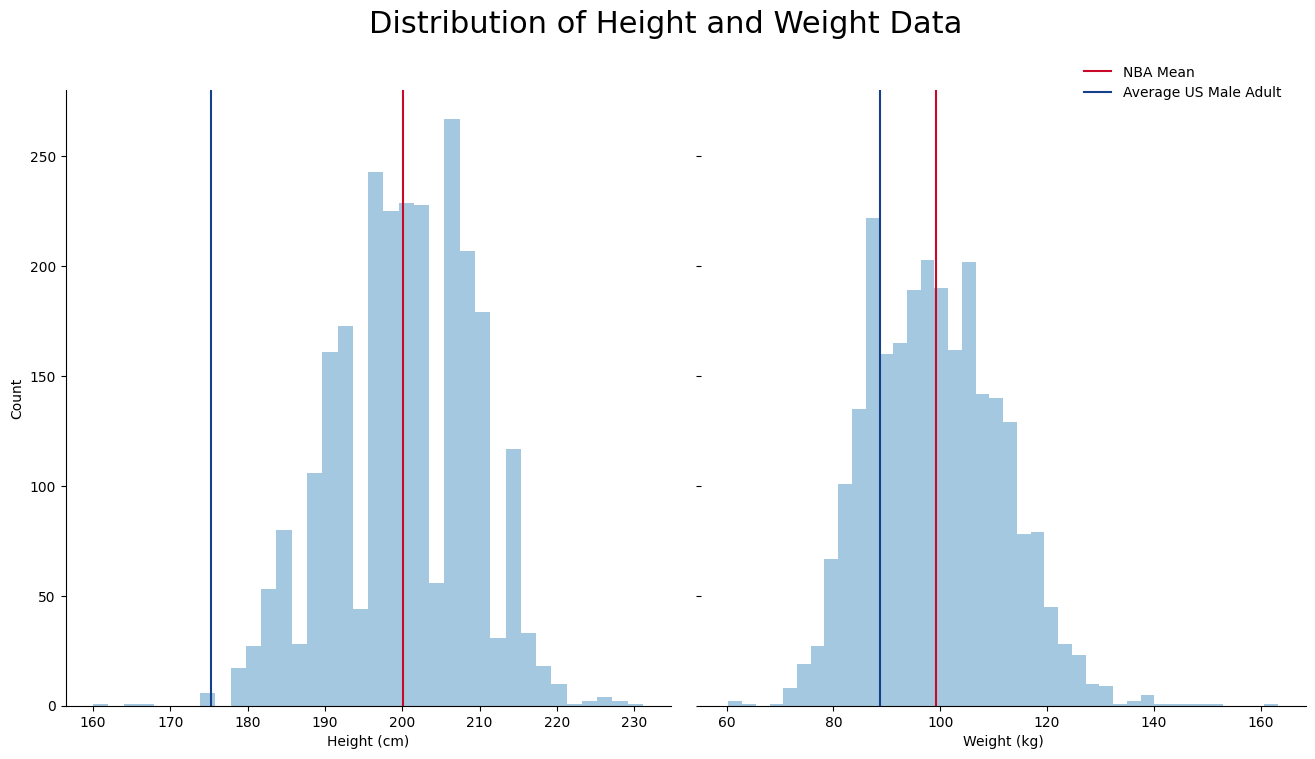

In [13]:
# Visualise distribution of height and weight data
# Source for average US male heigh: https://en.wikipedia.org/wiki/Average_human_height_by_country
# Source for average US male weight:https://en.wikipedia.org/wiki/Human_body_weight

fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBA Mean')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='#17408b', label='Average US Male Adult')
ax[1].axvline(88.8, color='#17408b', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()

Both, height and weight, are distributed normally in the NBA. However, it is clear that NBA athletes stand out in terms of their height and weight when compared to regular adult males.

In [14]:
fig = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Weight (for interactive exploration)',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

This table utalises Plotly visualisation library. One big advatage of a Plotly table is inherent responsiveness without having to write additional lines of code. This allows to hover over the data points and observe:
* The tallest player ever to step on the NBA floor was Gheorghe Muresan with a hight of 231cm
* The shortest player is Muggsy Bogues standing at 160cm
* Sim Bhullar is by far the heaviest player weighting 163kg (he also made history by [being the first NBA player of Indian descent](https://www.sactownroyalty.com/2020/4/7/21211433/sacramento-kings-history-april-7-sim-bhullar-breaks-a-barrier-first-indian-nba-player))

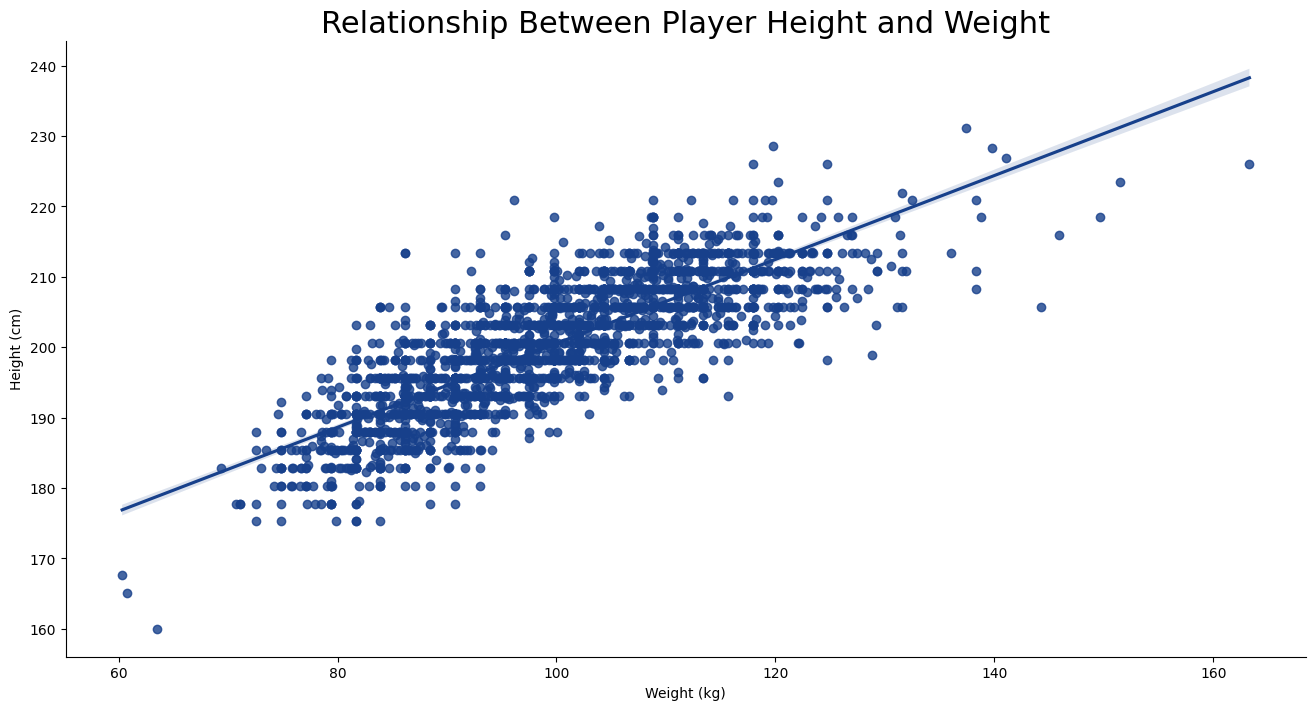

In [15]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=main_variables, color='#17408b')

plt.title('Relationship Between Player Height and Weight', fontsize=22)
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()

In [16]:
corr = stats.pearsonr(main_variables['player_height'], main_variables['player_weight'])

print(f"Correlation between player height and weight is: {corr[0]}. The statistical significance of this relationship is {corr[1]}")

Correlation between player height and weight is: 0.8150902497917963. The statistical significance of this relationship is 0.0


Not surprisingly, height and weight are two closely related variables.

In [17]:
corr_over_seasons = df.groupby('season')[['player_weight','player_height']].corr().unstack().iloc[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=corr_over_seasons.index, 
                         y=corr_over_seasons.values,
                         mode='lines',
                         name='lines',
                         line=dict(color='#17408b')
                        ))

fig.update_layout(
    title='NBA Player Height and Weight Correlation Each Season',
    xaxis_title='Season',
    yaxis_title='Correlation',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

However, if we break down the correlation by season, we can see that it is steadily decreasing. This is an early indicator of the changing body types of NBA players.

### 3.2 Height and Weight over Time <a id="3.2"></a>

C:\Users\User\AppData\Local\Temp\ipykernel_21864\2438161533.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_21864\2438161533.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




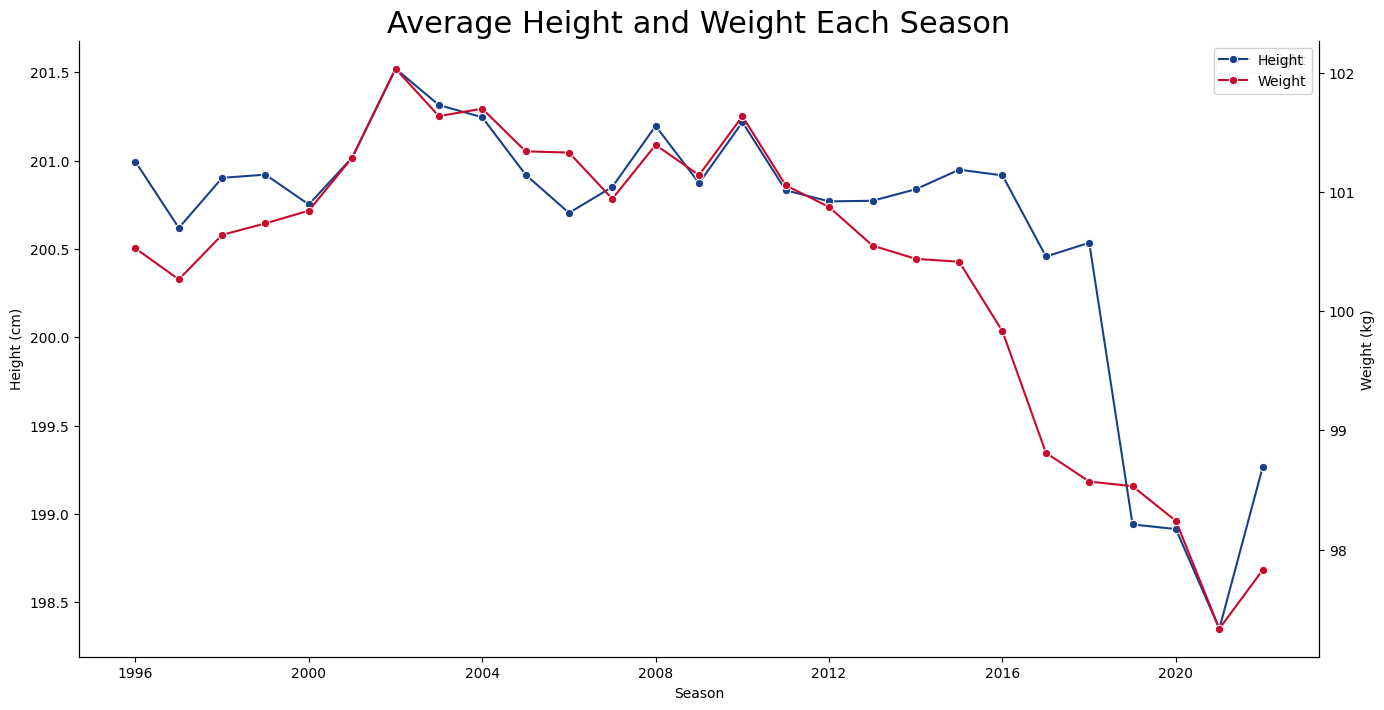

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=df['season'], y='player_height', data=df, marker="o", ax=ax, ci=None, label='Height', color='#17408b')
sns.lineplot(x=df['season'], y='player_weight', data=df, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight Each Season', fontsize=22)
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21864\1809255810.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




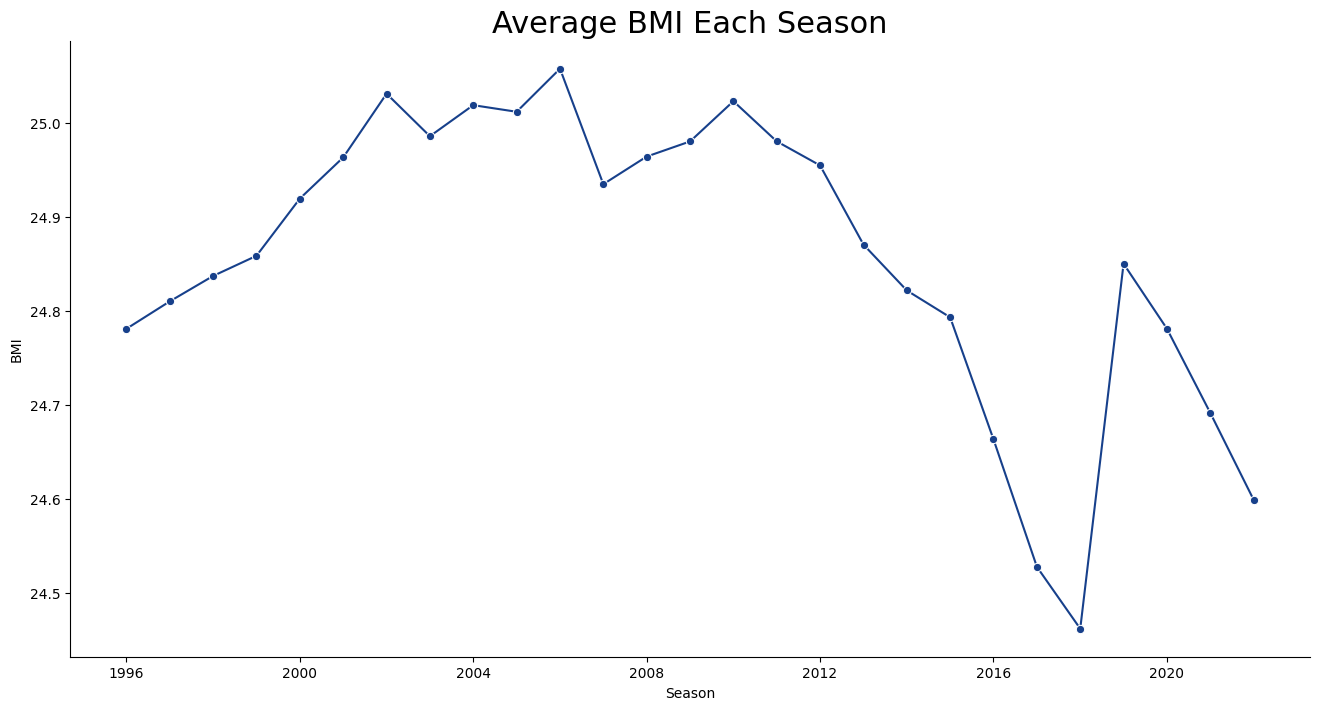

In [19]:
df['bmi'] = df['player_weight'].values / (df['player_height'].values ** 2) * 10000

plt.figure(figsize=(16, 8))

sns.lineplot(x=df['season'], y='bmi', data=df, marker="o", ci=None, color='#17408b')

plt.title('Average BMI Each Season', fontsize=22)
plt.ylabel('BMI')
plt.xlabel('Season')
sns.despine()

plt.show()

2019 seems to be an outlier in the BMI decrease trend, so let's explore it in a little more detail by displaying the top 10 players with the highest BMI. 

In [20]:
bmi_exploration = df[df['season'] == '2019']
bmi_exploration[['player_name','bmi']].sort_values(by='bmi',ascending=False)[:10]

,player_name,bmi
11029,Zion Williamson,32.819132
10667,Jarrell Brantley,29.645345
10899,Eric Paschall,29.467882
10918,Deonte Burton,29.213394
10855,Andre Drummond,29.172554
11135,P.J. Tucker,29.052438
11120,Paul Millsap,28.951888
11014,Wendell Carter Jr.,28.932881
10775,Jusuf Nurkic,28.895977
10847,Admiral Schofield,28.578113


Ahh... the 2019 NBA roster has some big bodies with this man leading the charge: 

<a><img style="" src="https://cdn.vox-cdn.com/thumbor/9U7Bn1ajYJ9ySFczKP9bno1HnIw=/0x0:1200x800/1200x800/filters:focal(348x97:540x289)/cdn.vox-cdn.com/uploads/chorus_image/image/60847977/Di9eY4zX0AApYXt.0.jpg"/></a>


C:\Users\User\AppData\Local\Temp\ipykernel_21864\3086686896.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_21864\3086686896.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




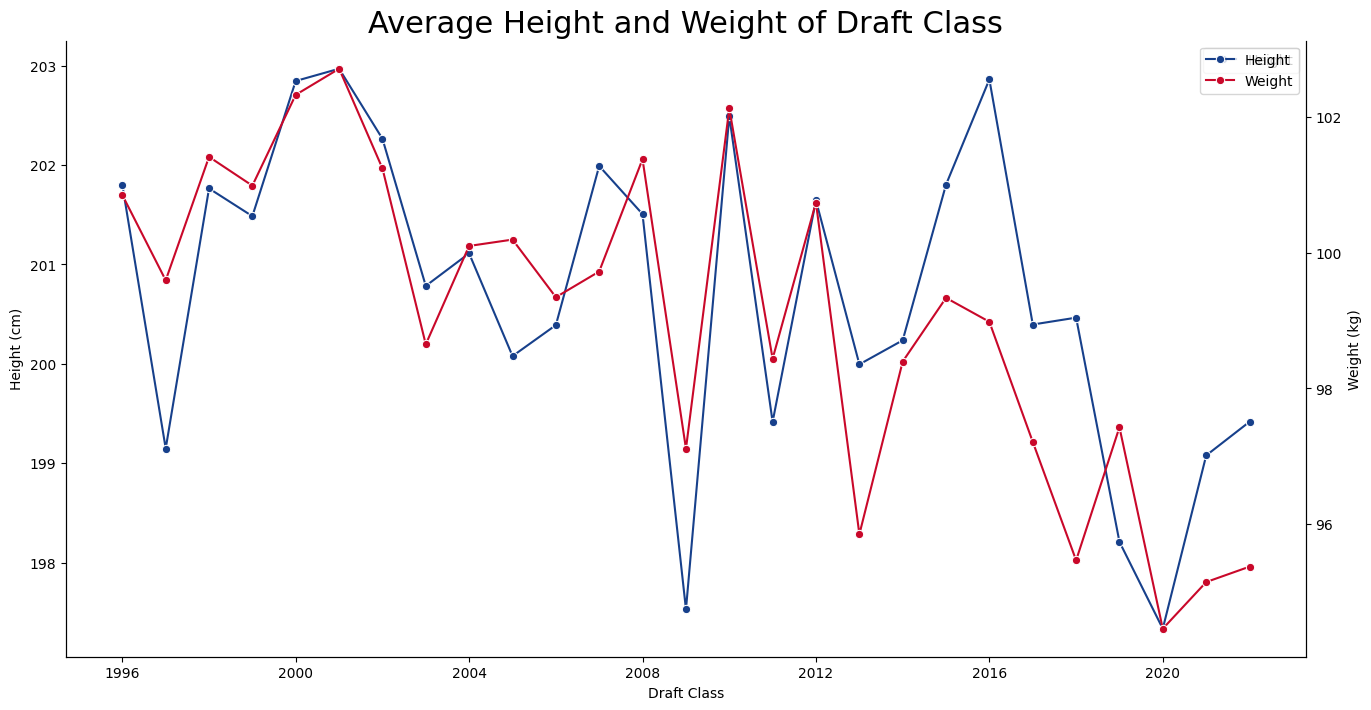

In [21]:
# Height and weight based on draft year

first_season_drafted = df.query('season == draft_year')

h_w_by_draft_year = first_season_drafted.groupby('draft_year')[['player_height', 'player_weight']].mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=h_w_by_draft_year.index, y='player_height', data=h_w_by_draft_year, marker="o", ax=ax, ci=None, label='Height', color='#17408b')
sns.lineplot(x=h_w_by_draft_year.index, y='player_weight', data=h_w_by_draft_year, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight of Draft Class', fontsize=22)
ax.xaxis.set_label_text('Draft Class')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

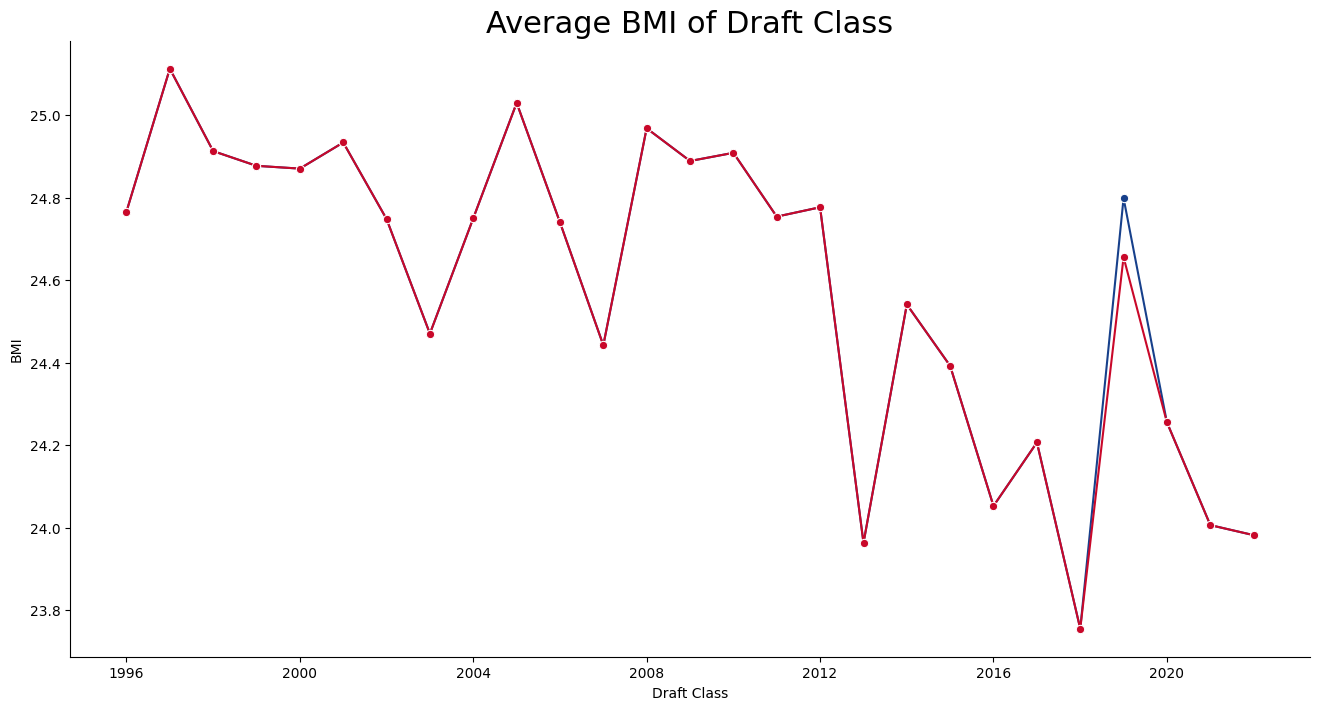

In [22]:
# BMI based on draft year

bmi_draft = h_w_by_draft_year['player_weight'] / (h_w_by_draft_year['player_height'] ** 2) * 10000
bmi_draft = pd.DataFrame(bmi_draft, columns=['bmi'])

first_season_drafted_nz = first_season_drafted[first_season_drafted['player_name'] != 'Zion Williamson']
h_w_by_draft_year_nz = first_season_drafted_nz.groupby('draft_year')[['player_height', 'player_weight']].mean()
bmi_draft_nz = h_w_by_draft_year_nz['player_weight'] / (h_w_by_draft_year_nz['player_height'] ** 2) * 10000
bmi_draft_nz = pd.DataFrame(bmi_draft_nz, columns=['bmi'])

plt.figure(figsize=(16, 8))

sns.lineplot(x=bmi_draft.index, y=bmi_draft['bmi'], data=bmi_draft, marker="o", color='#17408b')
sns.lineplot(x=bmi_draft_nz.index, y=bmi_draft_nz['bmi'], data=bmi_draft, marker="o", color='#c9082a')

plt.title('Average BMI of Draft Class', fontsize=22)
plt.ylabel('BMI')
plt.xlabel('Draft Class')
sns.despine()

plt.show()

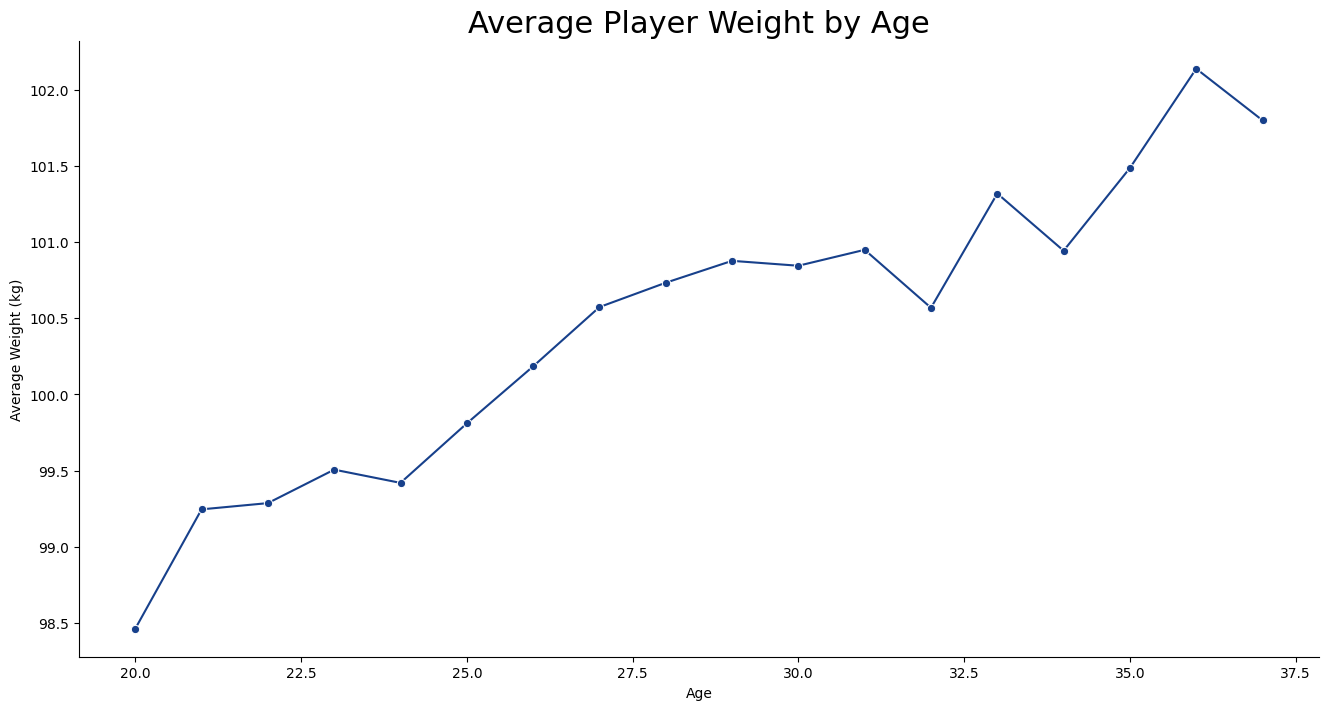

In [23]:
# Weight and player age

plt.figure(figsize=(16, 8))

w_by_age = df.groupby(['age'])['player_weight'].agg(['mean', 'count'])
w_by_age['outliers'] = np.where(w_by_age['count']<=100, 1, 0)
w_by_age = w_by_age.loc[w_by_age['outliers']==0]

sns.lineplot(x=w_by_age.index, y='mean', data=w_by_age, marker='o', color='#17408b')

plt.title('Average Player Weight by Age', fontsize=22)
plt.ylabel('Average Weight (kg)')
plt.xlabel('Age')
sns.despine()

plt.show()

It appears that players gain more weight as they age. This makes sense, as their bodies mature and they build more muscle.

### 3.3 Size and Geography <a id="3.3"></a>

In [24]:
# Select player height and weight when they entered the league
relevant_fields = df[['player_name', 'player_height', 'player_weight', 'country', 'season']]
player_first_season = relevant_fields.loc[relevant_fields.groupby(['player_name']).season.idxmin()]

# Group by country and count the number of players for each country
df_geography = player_first_season.groupby('country', as_index=False).agg(
                                                                          {'player_height': 'mean', 'player_weight':'mean', 'player_name':'count'}
                                                                          ).rename({'player_name': 'count'}, axis=1) 

# Select countries that have at least five unique players
df_geography = df_geography[df_geography['count'] >= 3]

# Add country codes for Plotly visualisation
df_geography = pd.merge(df_geography, country_codes, how='inner', on='country')

In [25]:
height_map = go.Choropleth(
    locations = df_geography['code_3digit'],
    z = df_geography['player_height'],
    text = df_geography['country'],
    colorscale = 'Blues',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Player Height (cm)'
)

weight_map = go.Choropleth(
    locations = df_geography['code_3digit'],
    z = df_geography['player_weight'],
    text = df_geography['country'],
    colorscale = 'Blues',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Player Weight (kg)',
    visible=False
)

data = [height_map, weight_map]

updatemenus = list([
    dict(type="buttons",
         y=0.7,
         buttons=list([   
            dict(label = 'Height Map',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Average NBA Player Height by Country'}]),

            dict(label = 'Weight Map',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Average NBA Player Weight by Country'}])
        ]),
    )
])

layout = dict(updatemenus=updatemenus,
             title_text='Average NBA Player Height by Country',
             geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'),
             margin=dict(l=0, r=0, b=0),
             height=500
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig)

The above visualisation showcases average player height and weight (minimum 3 unique players) based on the country they were born in (or have citizenship of).

### 3.4 Height and Weight Impact on Performance <a id="3.4"></a>

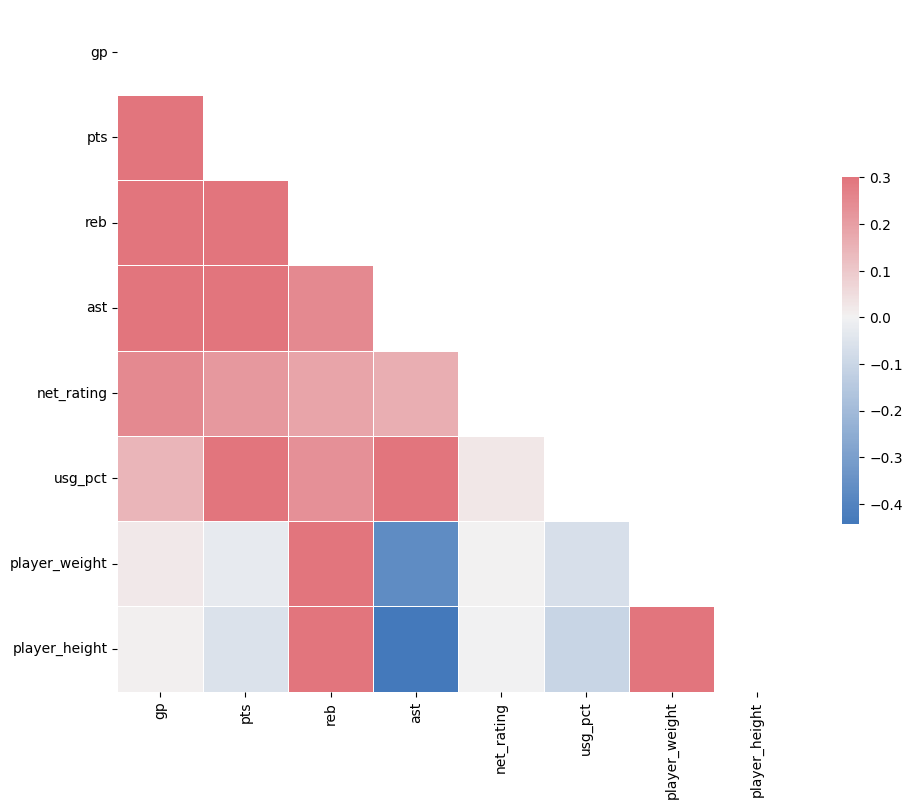

In [26]:
df_corr = df[df['season'] != '2019-01-01']
df_corr = df[['gp','pts','reb','ast','net_rating','usg_pct','player_weight', 'player_height']]

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

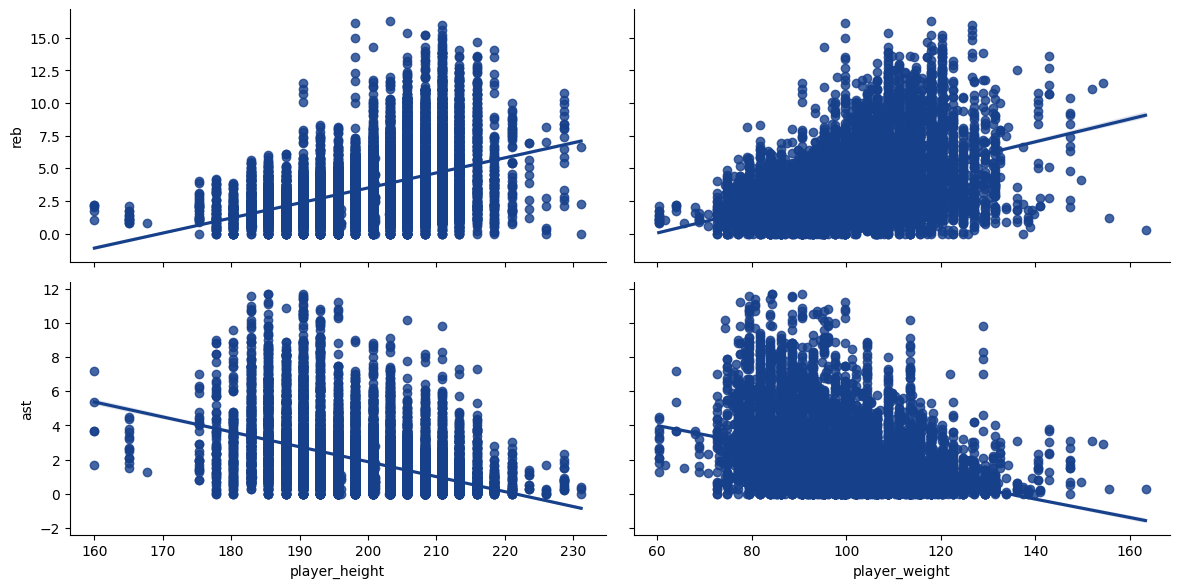

In [27]:
g = sns.PairGrid(df_corr, y_vars=['reb','ast'], x_vars=["player_height", "player_weight"], height=3, aspect=2)
g.map(sns.regplot, color='#17408b')
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])
plt.show()

Neither height or weight seem to have significant impact on the total games played and average points scored. However, as expected, height and weight do impact average assist and rebound statistics.

In [28]:
corr_w_r = df.groupby('season')[['player_weight','reb']].corr().unstack().iloc[:,1]
corr_w_a = df.groupby('season')[['player_weight','ast']].corr().unstack().iloc[:,1]

corr_h_r = df.groupby('season')[['player_height','reb']].corr().unstack().iloc[:,1]
corr_h_a = df.groupby('season')[['player_height','ast']].corr().unstack().iloc[:,1]

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=corr_w_r.index, y=corr_w_r.values,
                    mode='lines',
                    name='Weight and Rebounds'))

fig.add_trace(go.Scatter(x=corr_w_a.index, y=corr_w_a.values,
                    mode='lines',
                    name='Weight and Assists'))

fig.add_trace(go.Scatter(x=corr_h_r.index, y=corr_h_r.values,
                    mode='lines',
                    name='Height and Rebounds'))

fig.add_trace(go.Scatter(x=corr_h_a.index, y=corr_h_a.values,
                    mode='lines',
                    name='Height and Assists'))

fig.update_layout(
    title='Correlation Coefficient Comparison Over Time',
    xaxis_title='Season',
    yaxis_title='Coefficient',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

Rebound coefficients are stable. However, the negative correlation for assists (the higher or heavier the player is the less assists he makes) has been reducing since 2011. This illustrates how the game is changing and the bigs are becoming a more integral to the overall playmaking of the team.

### 3.5 Weight Transformations <a id="3.5"></a>

In [30]:
# Largest body weigth transformations

# Compute weight percentage change values for each player by age
w_pct_change = df.groupby(['season', 'player_name'], as_index=False)['player_weight'].mean().sort_values(['player_name', 'season'])
w_pct_change_values = w_pct_change.groupby(['player_name'])['player_weight'].apply(lambda x: x.pct_change())
w_pct_change = pd.concat([w_pct_change, w_pct_change_values], axis=1).fillna(0)
w_pct_change.columns = ['season', 'player_name', 'weight', 'pct_change']

counts = w_pct_change['player_name'].value_counts()
w_pct_change = w_pct_change[w_pct_change['player_name'].isin(counts.index[counts > 5])]

w_pct_change['sig_cng'] = np.where((w_pct_change.groupby('player_name')['pct_change'].transform('max') > 0.15) | (w_pct_change.groupby('player_name')['pct_change'].transform('min') < -0.15), 1, 0)

In [31]:
a = w_pct_change[w_pct_change['sig_cng'] == 1]

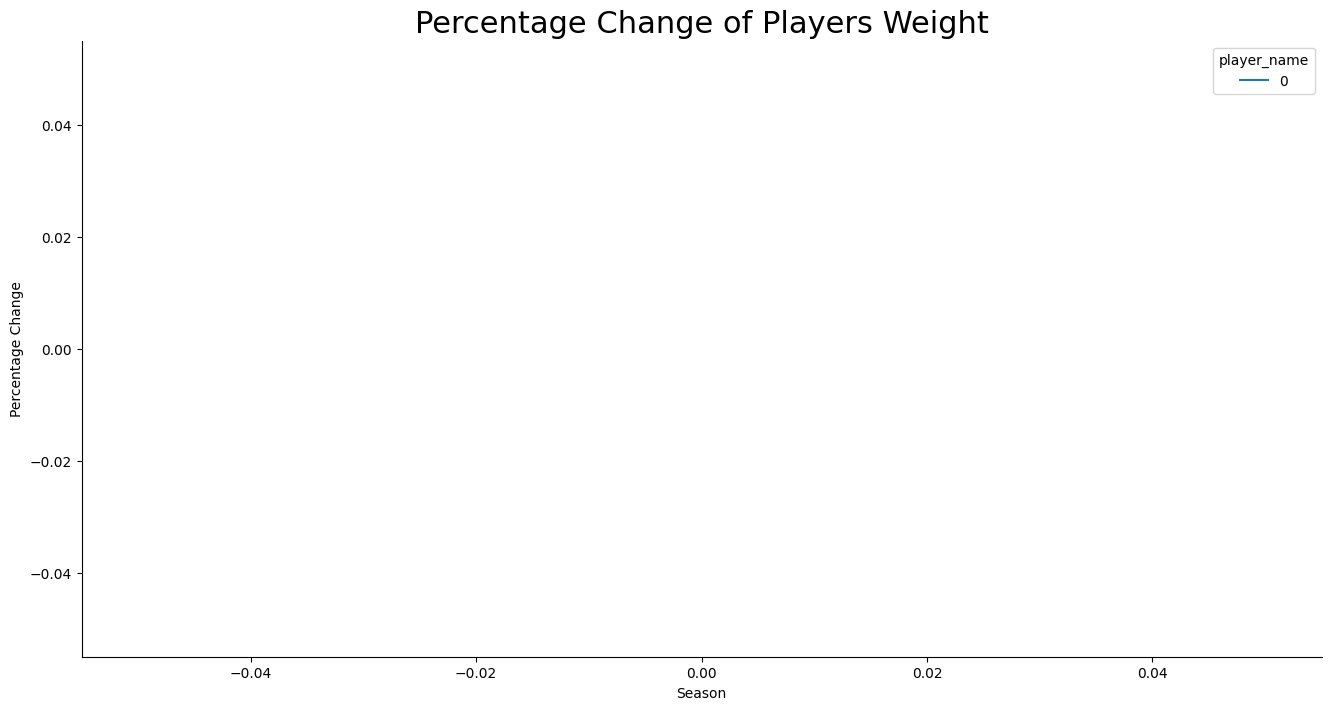

In [32]:
plt.figure(figsize=(16, 8))

sns.lineplot(x="season", y="weight", data=a, units='player_name', estimator=None, hue='player_name')

plt.title('Percentage Change of Players Weight', fontsize=22)
plt.ylabel('Percentage Change')
plt.xlabel('Season')
sns.despine()

plt.show()

### 3.6 Optimal Heights and Weights <a id="3.6"></a>

In [33]:
df = df[df['net_rating'] < 40]
df = df[df['net_rating'] > -20]

df['height_bin'] = pd.qcut(df['player_height'], q=6)
df['weight_bin'] = pd.qcut(df['player_weight'], q=6)

In [34]:
fig = px.box(df.query('season > 2010'), y="net_rating", color="height_bin")
fig.show()

c:\Users\User\NBA-Height-and-Weight-Analysis\nba\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [35]:
fig = px.box(df.query('season < 2000'), y="net_rating", color="height_bin")
fig.show()

c:\Users\User\NBA-Height-and-Weight-Analysis\nba\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## **4. Player Clustering** <a id="4"></a>

In [36]:
df = df.query('season == 2019')
df = df.query('gp >= 10')

X = df[['player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating']]

scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

row_clusters = linkage(X_std,
                       method='complete',
                       metric='euclidean')

C:\Users\User\AppData\Local\Temp\ipykernel_21864\2729877830.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_21864\2729877830.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



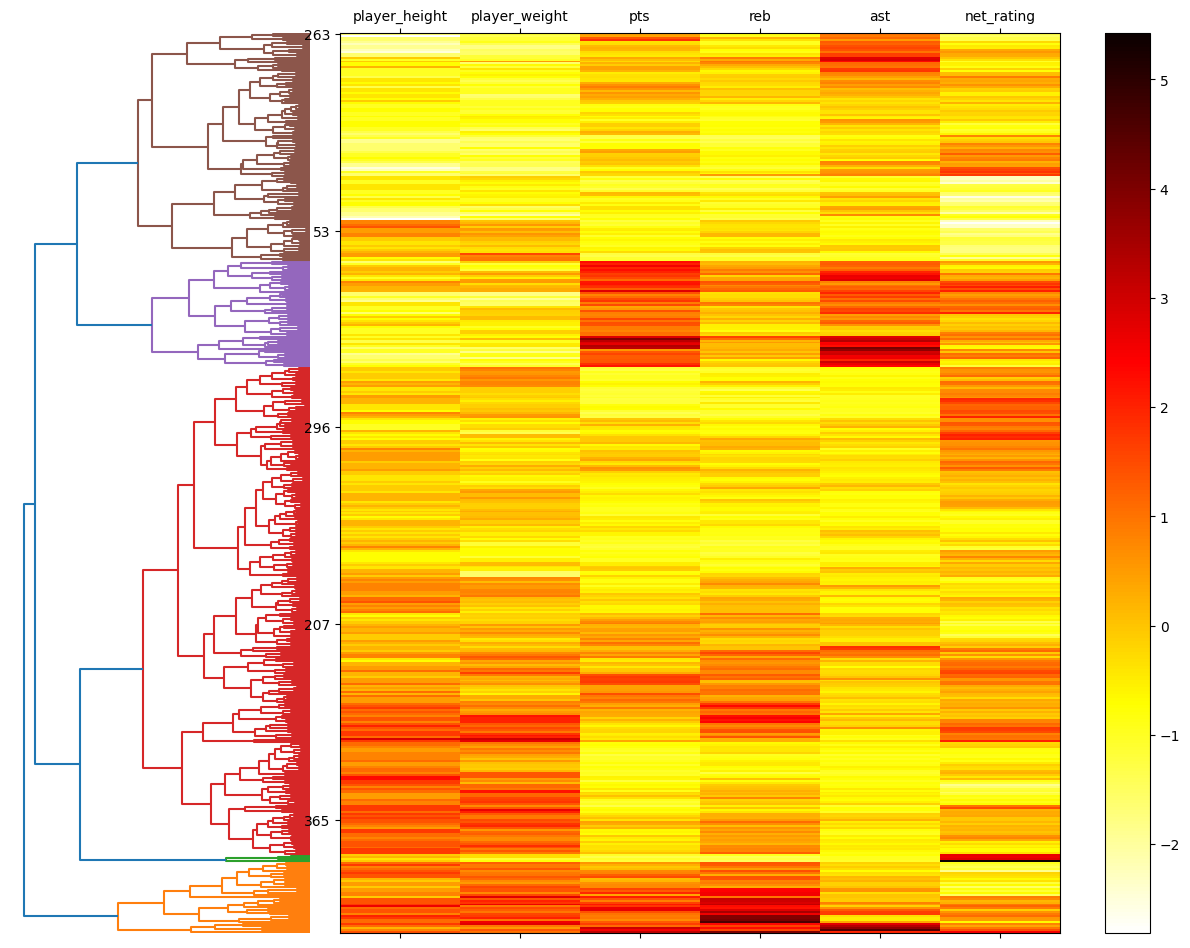

In [37]:
fig = plt.figure(figsize=(15,15), facecolor='white')
axd = fig.add_axes([0.01, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                       orientation='left')

df_rowclust = X_std.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r',
                  aspect='auto')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

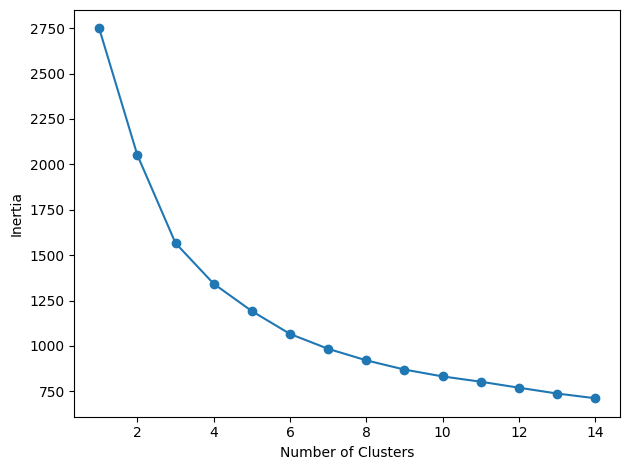

In [38]:
inertia = []
for i in range (1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42)
    km.fit(X_std)
    inertia.append(km.inertia_)
    
plt.plot(range(1,15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.26866513309916645
For n_clusters = 5 The average silhouette_score is : 0.20282510394738
For n_clusters = 10 The average silhouette_score is : 0.19164780764022965


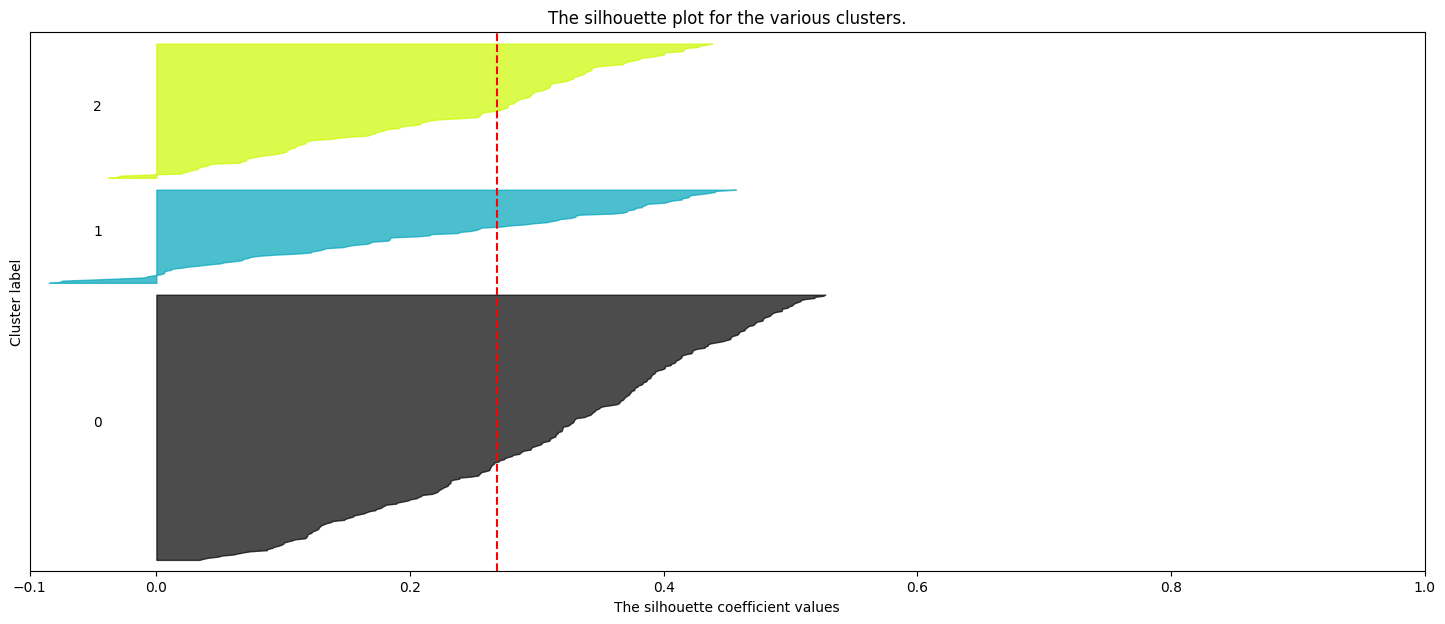

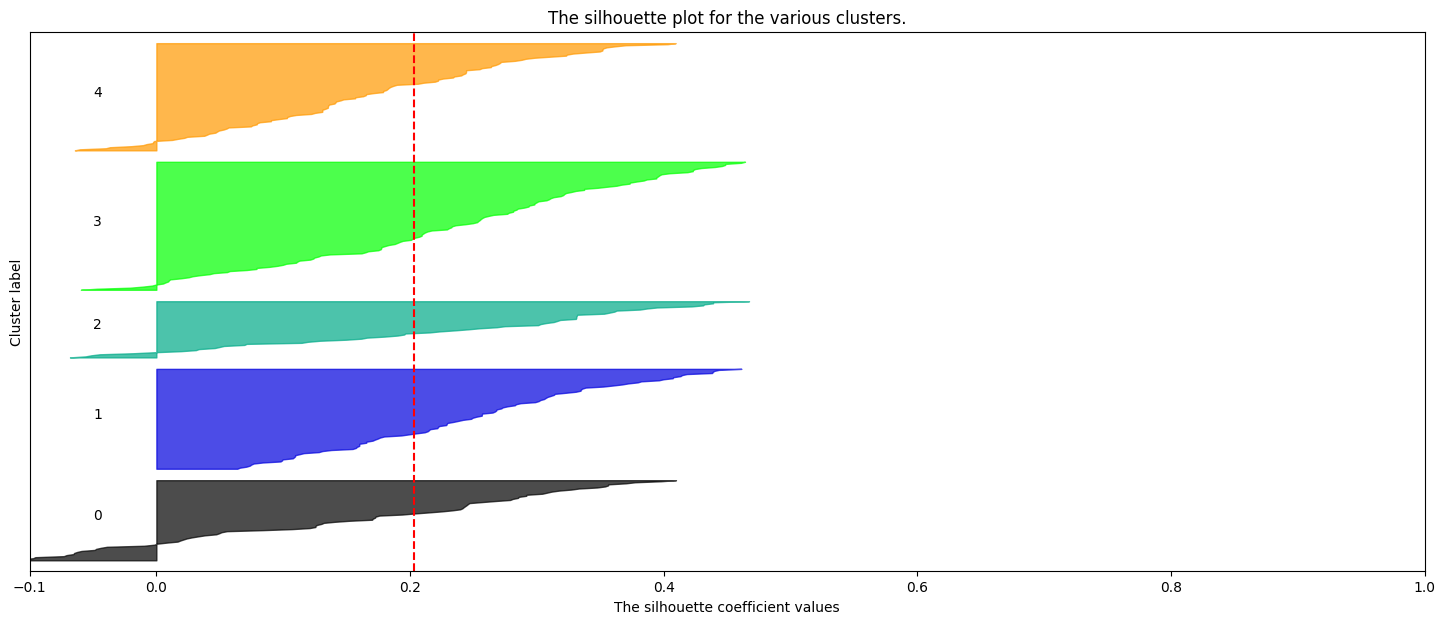

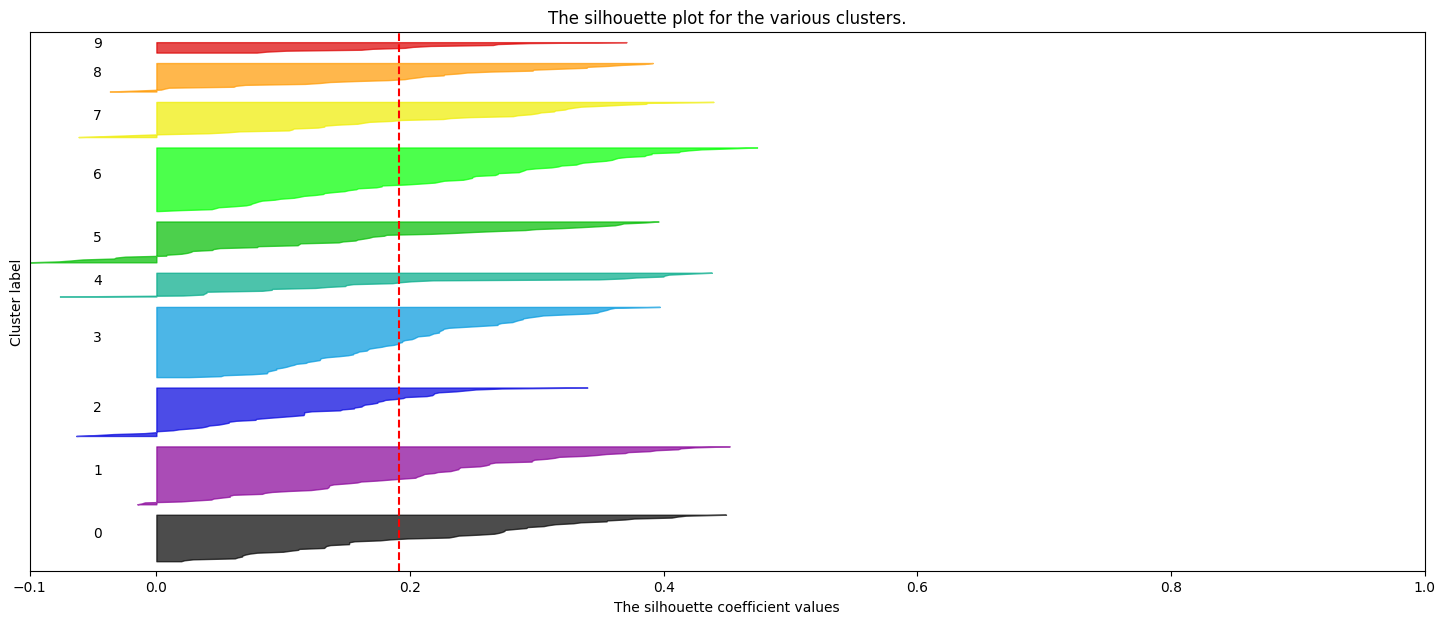

In [39]:
range_n_clusters = [3, 5, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,
                       n_init=100,
                       max_iter=500,
                       random_state=42)
    
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [40]:
clusterer = KMeans(n_clusters=10,
                       n_init=100,
                       max_iter=500,
                       random_state=42)
    
cluster_labels = clusterer.fit_predict(X_std)

X['cluster'] = cluster_labels

X.groupby('cluster').mean().sort_values(by='player_height')

C:\Users\User\AppData\Local\Temp\ipykernel_21864\3243390396.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player_height,player_weight,pts,reb,ast,net_rating
cluster,,,,,,
5,186.574545,84.718615,9.150000,2.577273,3.270455,-0.079545
7,190.700526,89.262131,19.776316,4.442105,5.873684,0.934211
1,192.999032,92.284024,5.185484,1.880645,1.309677,-7.283871
3,196.934667,93.893544,8.064000,2.933333,1.414667,1.877333
8,198.201935,98.195352,3.287097,1.725806,0.664516,8.541935
2,201.636923,101.883742,14.140385,5.336538,2.434615,-2.026923
9,202.988333,103.721371,23.958333,7.658333,5.816667,8.591667
6,205.441176,105.280037,4.973529,3.211765,0.879412,-6.323529
4,209.452308,116.608036,17.050000,10.496154,2.611538,0.880769


## **5. Conclusion** <a id="5"></a>

<a><img style="float: right;" src="https://preview.redd.it/30szuy4xkjhz.jpg?auto=webp&s=012cd6b49ab610c3e37e7f3db9e34cd4f29a988b" width="300" /></a> This notebook provides data supported evidence on how the bodies of NBA players have changed over time.